# 1.0 CNN Architectures

Typical CNN architectures stack a few convolutional layers (each one generally followed
by a ReLU layer), then a pooling layer, then another few convolutional layers
(+ReLU), then another pooling layer, and so on. The image gets smaller and smaller
as it progresses through the network, but it also typically gets deeper and deeper (i.e.,
with more feature maps), thanks to the convolutional layers. At the
top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers (+ReLUs), and the final layer outputs the prediction (e.g., a softmax layer that outputs estimated class probabilities).


<center><img width="600" src="https://drive.google.com/uc?export=view&id=1c0D3t94_9thipKwsHHMj5YTl2HEUg9Kn"></center><center>Typical CNN architecture</center>

Over the years, variants of this fundamental architecture have been developed, leading
to amazing advances in the field. A good measure of this progress is the error rate
in competitions such as the [ILSVRC ImageNet challenge](http://image-net.org/). In this competition the top five
error rate for image classification fell from over 26% to less than 2.3% in just six
years. The top-five error rate is the number of test images for which the system’s top
five predictions did not include the correct answer. The images are large (256 pixels
high) and there are 1,000 classes, some of which are really subtle (try distinguishing
120 dog breeds). Looking at the evolution of the winning entries is a good way to
understand how CNNs work.

We will first look at the classical **LeNet-5 architecture (1998)**, then three of the winners
of the ILSVRC challenge: **AlexNet (2012)**, **GoogLeNet (2014)**, and **ResNet
(2015)**.


## 1.1 LeNet-5

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,AveragePooling2D,Flatten,Dense,BatchNormalization,Activation
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime
import os
import pytz

In [ ]:
# load the datasets
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0

# train and test sets
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

# print shape
print("Train shape: {0:}".format(train_x.shape))
print("Test shape: {0:}".format(test_x.shape))

11493376/11490434 [==============================] - 0s 0us/step
Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [ ]:
train_x[0].shape

TensorShape([28, 28, 1])

The [LeNet-5 architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) is perhaps the most widely known CNN architecture. As mentioned earlier, it was created by Yann LeCun in 1998 and has been widely used
for handwritten digit recognition (MNIST). It is composed of the 7 layers such as: 3 convolutional layers, 2 subsampling (avg pooling) layers and 2 fully connected layers.

<center><img width="800" src="https://drive.google.com/uc?export=view&id=1cbeESUfIOLGZ5JgqLEsM-8TGrM9X6Bdn"></center><center>LeNet-5 architecture</center>


In [ ]:
# create model
lenet5 = Sequential()

lenet5.add(Conv2D(6, (5,5), strides=1,  activation='tanh', input_shape=(28,28,1), padding='same')) #C1
lenet5.add(AveragePooling2D()) #S2
lenet5.add(Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid')) #C3
lenet5.add(AveragePooling2D()) #S4
lenet5.add(Flatten()) #Flatten
lenet5.add(Dense(120, activation='tanh')) #C5
lenet5.add(Dense(84, activation='tanh')) #F6
lenet5.add(Dense(10, activation='softmax')) #Output layer

In [ ]:
lenet5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_10 (Dense)             (None, 84)               

In [ ]:
class MyCustomCallback(tf.keras.callbacks.Callback):

  def on_train_begin(self, batch, logs=None):
    self.begins = time.time()
    print('Training: begins at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%Y-%m-%d %H:%M:%S")))

  def on_train_end(self, logs=None):
    print('Training: ends at {}'.format(datetime.datetime.now(pytz.timezone('America/Fortaleza')).strftime("%Y-%m-%d %H:%M:%S")))
    print('Duration: {}s'.format(time.time() - self.begins))

In [ ]:
# Instantiate a logistic loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# configure the optimizer, loss, and metrics to monitor.
lenet5.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = lenet5.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=5,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()])

Training: begins at 2020-11-16 08:57:30
Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2239 - sparse_categorical_accuracy: 0.9330 - val_loss: 0.0975 - val_sparse_categorical_accuracy: 0.9709
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - sparse_categorical_accuracy: 0.9731 - val_loss: 0.0689 - val_sparse_categorical_accuracy: 0.9775
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0586 - sparse_categorical_accuracy: 0.9816 - val_loss: 0.0580 - val_sparse_categorical_accuracy: 0.9818
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0457 - sparse_categorical_accuracy: 0.9860 - val_loss: 0.0519 - val_sparse_categorical_accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0363 - sparse_categorical_accuracy: 0.9879 - val_loss: 0.0548 - val_sparse_categorical_accuracy: 0.9823
Training: ends at 2020-11-16 08:57:58
Duration: 28.6842

In [ ]:
loss, acc = lenet5.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = lenet5.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - sparse_categorical_accuracy: 0.9906
Train loss: 0.029 - acc: 0.991
313/313 [==============================] - 1s 2ms/step - loss: 0.0548 - sparse_categorical_accuracy: 0.9823
Test loss: 0.055 - acc: 0.982


In [ ]:
print("[INFO] evaluating network...")
predictions = lenet5.predict(test_x, batch_size=32)
print(classification_report(test_y,predictions.argmax(axis=1)))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



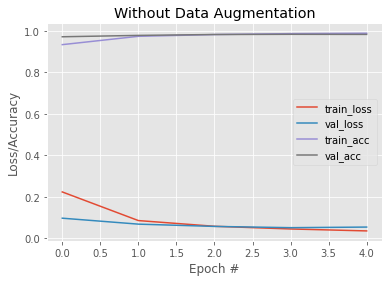

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), history.history["sparse_categorical_accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), history.history["val_sparse_categorical_accuracy"], label="val_acc")
plt.title("Without Data Augmentation")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

### 1.1.1 LeNet-5 + BatchNormalization Before Relu

In [ ]:
# create model
lenet5 = Sequential()

lenet5.add(Conv2D(6, (5,5), strides=1, input_shape=(28,28,1), padding='same')) #C1
lenet5.add(BatchNormalization())
lenet5.add(Activation("tanh"))

lenet5.add(AveragePooling2D()) #S2

lenet5.add(Conv2D(16, (5,5), strides=1, padding='valid')) #C3
lenet5.add(BatchNormalization())
lenet5.add(Activation("tanh"))

lenet5.add(AveragePooling2D()) #S4

lenet5.add(Flatten()) #Flatten

lenet5.add(Dense(120)) #C5
lenet5.add(BatchNormalization())
lenet5.add(Activation("tanh"))

lenet5.add(Dense(84)) #F6
lenet5.add(BatchNormalization())
lenet5.add(Activation("tanh"))

lenet5.add(Dense(10, activation='softmax')) #Output layer

In [ ]:
# In order to make the batch normalization work during training, 
# we need to keep track of the 4 parameters per feature on the previous layer: 
# [gamma weights, beta weights, moving_mean, moving_variance].
# Moreover, both moving_mean, moving_variance are non-trainable.

lenet5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 6)         24        
_________________________________________________________________
activation (Activation)      (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 10, 10, 16)       

In [ ]:
# Instantiate a logistic loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# configure the optimizer, loss, and metrics to monitor.
lenet5.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = lenet5.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=5,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()])

Training: begins at 2020-11-15 10:04:16
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1511 - sparse_categorical_accuracy: 0.9560 - val_loss: 0.0823 - val_sparse_categorical_accuracy: 0.9735
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0659 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.0394 - val_sparse_categorical_accuracy: 0.9867
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0512 - sparse_categorical_accuracy: 0.9838 - val_loss: 0.0369 - val_sparse_categorical_accuracy: 0.9872
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0448 - sparse_categorical_accuracy: 0.9856 - val_loss: 0.0444 - val_sparse_categorical_accuracy: 0.9865
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0383 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0338 - val_sparse_categorical_accuracy: 0.9896
Training: ends at 2020-11-15 10:04:51
Duration: 35.0117

In [ ]:
loss, acc = lenet5.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = lenet5.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0217 - sparse_categorical_accuracy: 0.9933
Train loss: 0.022 - acc: 0.993
313/313 [==============================] - 1s 2ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9896
Test loss: 0.034 - acc: 0.990


### 1.1.2 LeNet-5 + BatchNormalization After Relu

In [ ]:
# create model
lenet5 = Sequential()

lenet5.add(Conv2D(6, (5,5), strides=1,  activation='tanh', input_shape=(28,28,1), padding='same')) #C1
lenet5.add(BatchNormalization())
lenet5.add(AveragePooling2D()) #S2

lenet5.add(Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid')) #C3
lenet5.add(BatchNormalization())
lenet5.add(AveragePooling2D()) #S4

lenet5.add(Flatten()) #Flatten
lenet5.add(Dense(120, activation='tanh')) #C5
lenet5.add(BatchNormalization())
lenet5.add(Dense(84, activation='tanh')) #F6
lenet5.add(BatchNormalization())

lenet5.add(Dense(10, activation='softmax')) #Output layer

In [ ]:
# In order to make the batch normalization work during training, 
# we need to keep track of the 4 parameters per feature on the previous layer: 
# [gamma weights, beta weights, moving_mean, moving_variance].
# Moreover, both moving_mean, moving_variance are non-trainable.

lenet5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
batch_normalization_8 (Batch (None, 10, 10, 16)        64        
_________________________________________________________________
average_pooling2d_7 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 400)              

In [ ]:
# Instantiate a logistic loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# configure the optimizer, loss, and metrics to monitor.
lenet5.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])

# training 
history = lenet5.fit(x=train_x,
                    y=train_y,
                    batch_size=32,
                    epochs=5,
                    validation_data=(test_x,test_y),
                    callbacks=[MyCustomCallback()])

Training: begins at 2020-11-15 10:14:31
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1750 - sparse_categorical_accuracy: 0.9463 - val_loss: 0.0853 - val_sparse_categorical_accuracy: 0.9723
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0758 - sparse_categorical_accuracy: 0.9766 - val_loss: 0.0436 - val_sparse_categorical_accuracy: 0.9857
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0577 - sparse_categorical_accuracy: 0.9819 - val_loss: 0.0498 - val_sparse_categorical_accuracy: 0.9846
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0453 - sparse_categorical_accuracy: 0.9863 - val_loss: 0.0580 - val_sparse_categorical_accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0387 - sparse_categorical_accuracy: 0.9875 - val_loss: 0.0608 - val_sparse_categorical_accuracy: 0.9819
Training: ends at 2020-11-15 10:15:05
Duration: 34.0645

In [ ]:
loss, acc = lenet5.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = lenet5.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0415 - sparse_categorical_accuracy: 0.9862
Train loss: 0.042 - acc: 0.986
313/313 [==============================] - 1s 2ms/step - loss: 0.0608 - sparse_categorical_accuracy: 0.9819
Test loss: 0.061 - acc: 0.982


### 1.1.3 Data Augmentation

According to [Goodfellow et al.](https://www.deeplearningbook.org/), regularization is

> “(...) any modification we make to a learning algorithm that is intended to reduce its generalization error, but not its training error”

In short, regularization seeks to reduce our testing error perhaps at the expense of increasing training error slightly.

We’ve already looked at different forms of regularization in the first part of this course; however, these were parameterized forms of regularization, requiring us to update our loss/update
function. In fact, there exist other types of regularization that either:

1. Modify the network architecture itself.
2. Augment the data passed into the network for training.

**Dropout** is a great example of modifying a network architecture by achieving greater generalizability. Here we insert a layer that randomly disconnects nodes from the previous layer to the next layer, thereby ensuring that no single node is responsible for learning how to represent a given class.

In this section we’ll be discussing another type of regularization called **data augmentation**. This method purposely perturbs training examples, changing their appearance slightly, before passing them into the network for training. The end result is that a network consistently sees “new” training data points generated from the original training data, partially alleviating the need for us to gather more training data (though in general, gathering more training data will rarely hurt your algorithm).

**Data augmentation** encompasses a wide range of techniques used to generate new training samples from the original ones by applying random jitters and perturbations such that the classes labels are
not changed. 

> Our goal when applying **data augmentation** is to increase the generalizability of the model. 

Given that our network is constantly seeing new, slightly modified versions of the input data points, it’s able to learn more robust features. 

> At testing time, we do not apply data augmentation
and evaluate our trained network – in most cases, you’ll see an increase in testing accuracy, perhaps at the expense at a slight dip in training accuracy.

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1PWNBYi_ziF8YnCCd25vnmsf9nxq-KsGH"></center><center><b>Left</b>: A sample of 250 data points that follow a normal distribution exactly. <b>Right</b>: Adding a small amount of random “jitter” to the distribution. This type of data augmentation can
increase the generalizability of our networks.</center>


Let’s consider the Figure above (**left**) of a normal distribution with zero mean and unit variance. Training a machine learning model on this data may result in us modeling the distribution exactly –
however, in real-world applications, data rarely follows such a neat distribution.

Instead, to increase the generalizability of our classifier, we may first randomly jitter points along the distribution by adding some values e drawn from a random distribution (**right**). Our plot
still follows an **approximately normal distribution**, but it’s not a perfect distribution as on the left. A model trained on this data is more likely to generalize to example data points not included in the
training set.
  **In the context of computer vision, data augmentation lends itself naturally**. For example, we can obtain additional training data from the original images by apply simple geometric transforms such as random:

1. Translations
2. Rotations
3. Changes in scale
4. Shearing
5. Horizontal (and in some cases, vertical) flips

Applying a (small) amount of these transformations to an input image will change its appearance slightly, but it does not change the class label – thereby making data augmentation a very natural, easy method to apply to deep learning for computer vision tasks.

In [ ]:
}# load the datasets
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.mnist.load_data()
train_x = train_x / 255.0
test_x = test_x / 255.0

# train and test sets
train_x = tf.expand_dims(train_x, 3)
test_x = tf.expand_dims(test_x, 3)

# print shape
print("Train shape: {0:}".format(train_x.shape))
print("Test shape: {0:}".format(test_x.shape))

Train shape: (60000, 28, 28, 1)
Test shape: (10000, 28, 28, 1)


In [ ]:
# visualize 18 numbers
def show_image(train_image, label, index):
    plt.subplot(3, 6, index+1)
    plt.imshow(tf.squeeze(train_image), cmap=plt.cm.gray)
    plt.title(label)
    plt.grid(b=None)

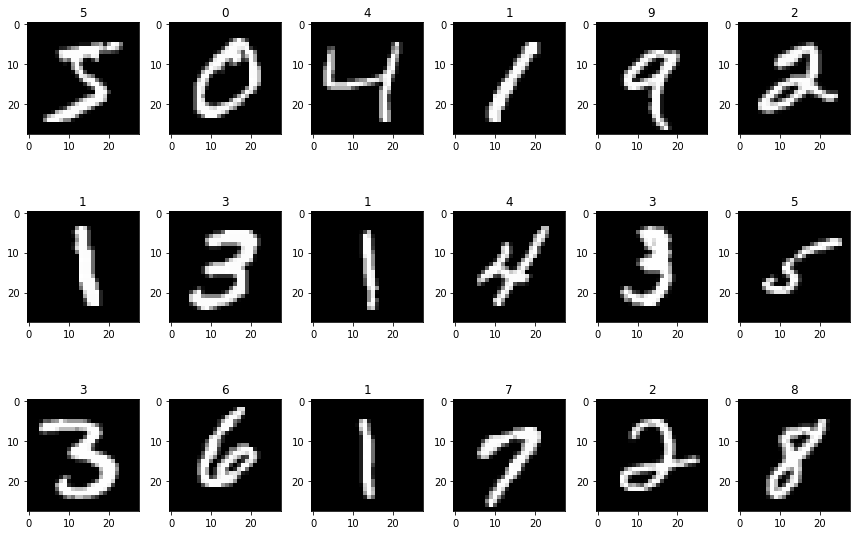

In [ ]:
# visualize the first 18 numbers
plt.figure(figsize=(12, 8))
for index in range(18):
    label = train_y[index]
    image_pixels = train_x[index,:,:,:]
    show_image(image_pixels, label, index)
plt.tight_layout()

[INFO] generating images...


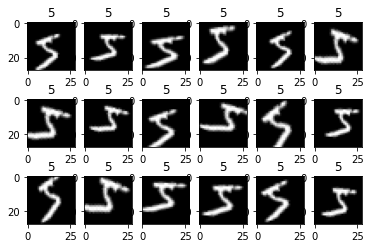

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# construct the image generator for data augmentation then
# initialize the total number of images generated thus far
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=False, fill_mode="nearest")
total = 0
image = train_x[0:1,:,:,:]

# construct the actual Python generator
print("[INFO] generating images...")
imageGen = aug.flow(image, batch_size=1)

# loop over examples from our image data augmentation generator
for img in imageGen:

  show_image(img, train_y[0], total)

  # increment our counter
  total += 1

  # if we have reached 10 examples, break from the loop
  if total == 18:
    break

In [ ]:
# create model
lenet5 = Sequential()

lenet5.add(Conv2D(6, (5,5), strides=1,  activation='tanh', input_shape=(28,28,1), padding='same')) #C1
lenet5.add(BatchNormalization())
lenet5.add(AveragePooling2D()) #S2

lenet5.add(Conv2D(16, (5,5), strides=1, activation='tanh', padding='valid')) #C3
lenet5.add(BatchNormalization())
lenet5.add(AveragePooling2D()) #S4

lenet5.add(Flatten()) #Flatten
lenet5.add(Dense(120, activation='tanh')) #C5
lenet5.add(BatchNormalization())
lenet5.add(Dense(84, activation='tanh')) #F6
lenet5.add(BatchNormalization())

lenet5.add(Dense(10, activation='softmax')) #Output layer

In [ ]:
# Instantiate a logistic loss function
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

# Instantiate an accuracy metric.
accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

# Instantiate an optimizer.
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# configure the optimizer, loss, and metrics to monitor.
lenet5.compile(optimizer=optimizer, loss=loss, metrics=[accuracy])


In [ ]:
# construct the image generator for data augmentation then
# initialize the total number of images generated thus far
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=False, fill_mode="nearest")

print("[INFO] training network...")
history = lenet5.fit(aug.flow(train_x, train_y, batch_size=32),
                     validation_data=(test_x, test_y), 
                     #steps_per_epoch=len(train_x) // 32,
                     epochs=5, verbose=1,
                     callbacks=[MyCustomCallback()])

[INFO] training network...
Training: begins at 2020-11-16 09:04:30
Epoch 1/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.4943 - sparse_categorical_accuracy: 0.8429 - val_loss: 0.0911 - val_sparse_categorical_accuracy: 0.9711
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2198 - sparse_categorical_accuracy: 0.9303 - val_loss: 0.0813 - val_sparse_categorical_accuracy: 0.9729
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1729 - sparse_categorical_accuracy: 0.9456 - val_loss: 0.0626 - val_sparse_categorical_accuracy: 0.9821
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1527 - sparse_categorical_accuracy: 0.9536 - val_loss: 0.0551 - val_sparse_categorical_accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1425 - sparse_categorical_accuracy: 0.9567 - val_loss: 0.0535 - val_sparse_categorical_accuracy: 0.9822
Training: ends at 

In [ ]:
loss, acc = lenet5.evaluate(x=train_x,y=train_y, batch_size=32)
print('Train loss: %.3f - acc: %.3f' % (loss, acc))

loss_, acc_ = lenet5.evaluate(x=test_x,y=test_y, batch_size=32)
print('Test loss: %.3f - acc: %.3f' % (loss_, acc_))

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0561 - sparse_categorical_accuracy: 0.9820
Train loss: 0.056 - acc: 0.982
313/313 [==============================] - 1s 2ms/step - loss: 0.0535 - sparse_categorical_accuracy: 0.9822
Test loss: 0.053 - acc: 0.982


In [ ]:
print("[INFO] evaluating network...")
predictions = lenet5.predict(test_x, batch_size=32)
print(classification_report(test_y,predictions.argmax(axis=1)))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.97      0.99      0.98       958
           7       0.98      0.99      0.98      1028
           8       0.98      0.94      0.96       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



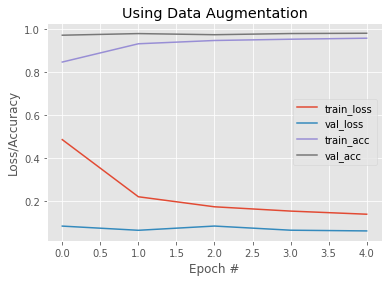

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 5), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, 5), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 5), history.history["sparse_categorical_accuracy"], label="train_acc")
plt.plot(np.arange(0, 5), history.history["val_sparse_categorical_accuracy"], label="val_acc")
plt.title("Using Data Augmentation")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [ ]:
# predictions
predictions = lenet5.predict(test_x)
results = np.argmax(predictions, axis = 1)

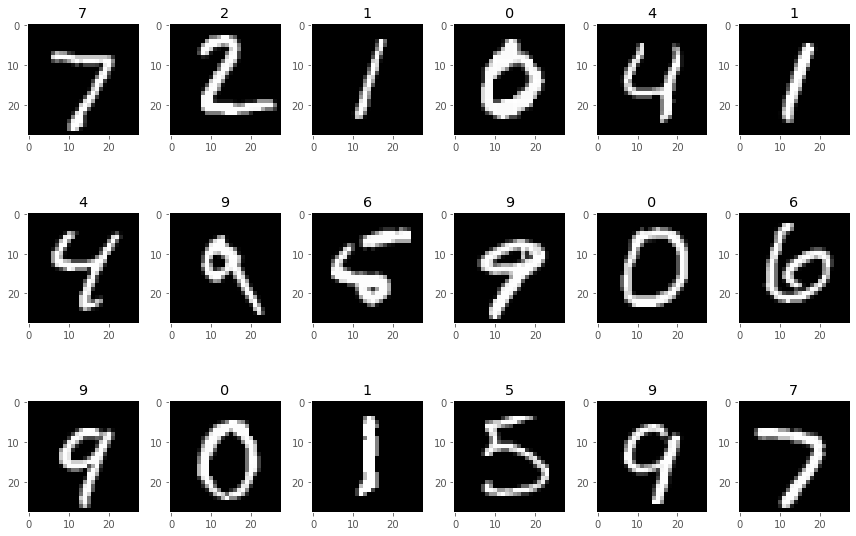

In [ ]:
# visualize the first 18 test results
plt.figure(figsize=(12, 8))
for index in range(18):
    label = results[index]
    image_pixels = test_x[index,:,:,:]
    show_image(image_pixels, label, index)
plt.tight_layout()

## 1.2 AlexNet

The [AlexNet CNN architecture](https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html) won the 2012 ImageNet ILSVRC challenge by a large margin: it achieved a top-five error rate of 17%, while the second best achieved only 26%! It was developed by Alex Krizhevsky (hence the name), Ilya Sutskever, and Geoffrey Hinton. 

**It is similar to LeNet-5, only much larger and deeper**, and it was the first to stack convolutional layers directly on top of one another, instead of stacking a pooling layer on top of each convolutional layer. Table below presents this architecture.

<center><img width="600" src="https://drive.google.com/uc?export=view&id=193aOD83q_m_apxqjv1kFSjGRYFV7HfL2"></center><center>AlexNet Architecture.</center>

To reduce overfitting, the authors used **two regularization techniques**. First, they applied dropout with a 50% dropout rate during training to the outputs of layers F9 and F10. Second, they performed **data augmentation** by randomly shifting the training images by various offsets, flipping them horizontally, and changing the lighting conditions.

**Data augmentation** artificially increases the size of the training set by generating many realistic variants of each training instance. **This reduces overfitting**, making this a regularization technique. The generated instances should be as realistic as possible:
ideally, given an image from the augmented training set, a human should not be able to tell whether it was augmented or not. Simply adding white noise will not help; the modifications should be learnable (white noise is not).

AlexNet also uses a competitive normalization step immediately after the ReLU step of layers C1 and C3, called **Local Response Normalization (LRN)**: the most strongly activated neurons inhibit other neurons located at the same position in neighboring feature
maps (such competitive activation has been observed in biological neurons). This encourages different feature maps to specialize, pushing them apart and forcing them to explore a wider range of features, ultimately improving generalization.

A variant of AlexNet called [ZF Net](https://arxiv.org/abs/1311.2901) was developed by Matthew Zeiler and Rob Fergus and won the 2013 ILSVRC challenge. It is essentially AlexNet with a few tweaked hyperparameters (number of feature maps, kernel size, stride, etc.).

In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# create a model
model = Sequential()

# Block #1: first CONV => RELU => POOL layer set
model.add(Conv2D(96, (11, 11), strides=(4, 4),
                 input_shape=(227,227,3), padding="valid",
                 kernel_regularizer=l2(0.0002),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.25))

# Block #2: second CONV => RELU => POOL layer set
model.add(Conv2D(256, (5, 5), padding="same",
                 kernel_regularizer=l2(0.0002),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.25))

# Block #3: CONV => RELU => CONV => RELU => CONV => RELU
model.add(Conv2D(384, (3, 3), padding="same",
                 kernel_regularizer=l2(0.0002),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(384, (3, 3), padding="same",
                 kernel_regularizer=l2(0.002),activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same",
                 kernel_regularizer=l2(0.002),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Dropout(0.25))

# Block #4: first set of FC => RELU layers
model.add(Flatten())
model.add(Dense(4096, kernel_regularizer=l2(0.0002),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block #5: second set of FC => RELU layers
model.add(Dense(4096, kernel_regularizer=l2(0.0002),activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# softmax classifier
model.add(Dense(2, kernel_regularizer=l2(0.0002)))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization_21 (Batc (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_22 (Batc (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 256)      